### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐/특성 : 무게
- 라벨/타겟 : 길이
- 학습 방법 : 지도학습 + 예측 => KNN기반의 회귀 (x값 상에서 가장 가까운 거리의 k개에 각각 대응되는 y값들의 평균을 답으로 예측)
- 학습/테스트 데이터 : 7대3

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

filename = '../DATA/fish.csv'

In [29]:
fishDF = pd.read_csv(filename)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


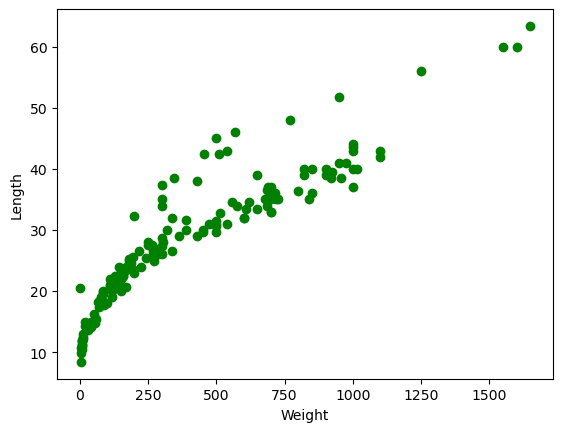

In [30]:
plt.plot(fishDF.Weight, fishDF.Length, 'go')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [31]:
# 훈련용 데이터 : 테스트 데이터 = (7 : 3) 으로 분리
# random_state => 랜덤 seed 값
x_train, x_test, y_train, y_test = \
    train_test_split(fishDF.Weight, fishDF.Length, test_size=0.3, random_state=10)

In [32]:
# KNN 회귀 모델 생성
knnreg = KNeighborsRegressor(n_neighbors=5)

In [33]:
knnreg.fit(x_train.to_frame(), y_train.to_frame())

KNeighborsRegressor()

In [34]:
knnreg.score(x_train.to_frame(), y_train.to_frame())

0.9283722275442096

In [35]:
y_pred = knnreg.predict(x_test.to_frame())

(6) 테스트 <hr>
- 제대로 만들어진 모델인지 확인하는 과정
    * 훈련용 데이터에 대한 점수
    * 테스트용 데이터에 대한 점수
    * 훈련점수와 테스트점수 비교
        - 훈련점수 > 테스트점수     : 과대적합 (overfitting)
        - 훈련점수 ≈ 테스트점수     : 최적접합
        - 훈련점수, 테스트점수 저조 : 과소적합 (underfitting)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# 결정계수 값
r2 = r2_score(y_test, y_pred)

In [38]:
# MAE
mae = mean_absolute_error(y_test, y_pred)

In [39]:
# MSE
mse = mean_squared_error(y_test, y_pred)

In [40]:
# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)   # deprecated

In [43]:
print(f'[모델설명도]\nR2 : {r2:.2f}')
print(f'[에러]\nR2 : {mae:.2f}')
print(f'[mse]\nR2 : {mse:.2f}')
print(f'[rmse]\nR2 : {rmse:.2f}')

[모델설명도]
R2 : 0.83
[에러]
R2 : 2.43
[mse]
R2 : 13.08
[rmse]
R2 : 3.62
